# __Heart Disease Diagnostic Tool__

## Fields

**Age**: Age (29 - 77) 

**Sex**: Sex (1 = male; 0 = female)  

**ChestPain**: Chest pain (0 : typical, 1 : asymptotic, 2 : nonanginal, 3 : nontypical)  

**RestBP**: Resting blood pressure (94 - 200 bpm)

**Chol**: Serum cholesteral in mg/dl (126 - 564)

**Fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)  

**RestECG**: Resting electrocardiographic results  (0: likely hypertrophy of the left ventricle, 1: normal, 2: ST-T wave abnormality)

**Thalach**: Maximum heart rate achieved (71 - 202 bpm)

**ExAng**: Exercise induced angina (1 = yes; 0 = no)  

**Oldpeak**: ST depression induced by exercise relative to rest (0 - 6.2 continuous)

**Slope**: Slope of the peak exercise ST segment (1: up, 2: flat, 3: down)

**Ca**: Coronary Calcium Scan: Number of major vessels colored by flourosopy showing plaque in the heart (0 - 3)  

**Thal**: Thalassemia: Heriditary Blood disorder resulting in reduced hemoglobin levels (3 = normal; 6 = fixed defect; 7 = reversable defect)  

**target**: AHD - Diagnosis of heart disease (1 = yes; 0 = no)  

Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## Exploring the Data

**Using pandas describe function provides an overview of the dataset including mean, minimums, maximums, percentiles, and standard deviations.**

In [1]:
import pandas as pd
print(pd.__version__)
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
heart_file_path = '/data/notebook_files/heart.csv'
heart_data = pd.read_csv(heart_file_path)

settings = {'min-width' : '40px'}
heart_data.describe().transpose().style.format(precision=0)


1.3.5


,count,mean,std,min,25%,50%,75%,max
age,303,54,9,29,48,55,61,77
sex,303,1,0,0,0,1,1,1
cp,303,1,1,0,0,1,2,3
trestbps,303,132,18,94,120,130,140,200
chol,303,246,52,126,211,240,274,564
fbs,303,0,0,0,0,0,0,1
restecg,303,1,1,0,0,1,1,2
thalach,303,150,23,71,134,153,166,202
exang,303,0,0,0,0,0,1,1
oldpeak,303,1,1,0,0,1,2,6


In [2]:
heart_data.dtypes

**All fields except oldpeak where inported as integers, converting the data types of several fields to boolean, creates clarity**

In [3]:
heart_data['sex'] = heart_data['sex'].astype('bool')
heart_data['fbs'] = heart_data['fbs'].astype('bool')
heart_data['exang'] = heart_data['exang'].astype('bool')
heart_data['target'] = heart_data['target'].astype('bool')

heart_data.dtypes

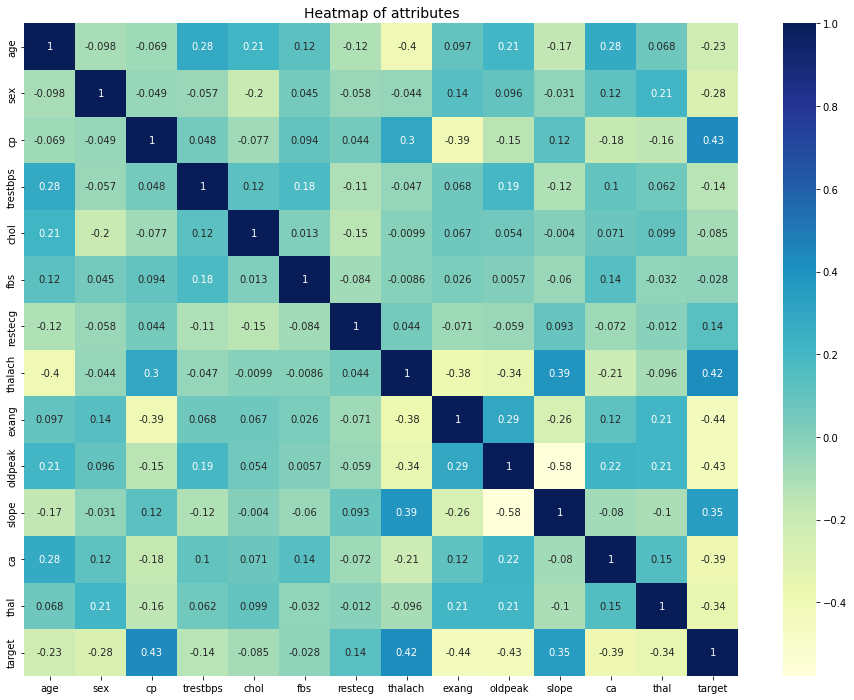

In [4]:
attributes = ['age', 'sex','cp', 'trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

fig, ax = plt.subplots(figsize=(16, 12))
plt.title('Heatmap of attributes', fontsize=14)
dataplot = sb.heatmap(heart_data.corr(), cmap="YlGnBu", annot=True)

**The heatmap shows that max heart rate(thalach) and chest pain types(cp) are the most strongly correlated with the target variable which is the diagnosis of heart disease.**  See pie chart and histogram below for details.

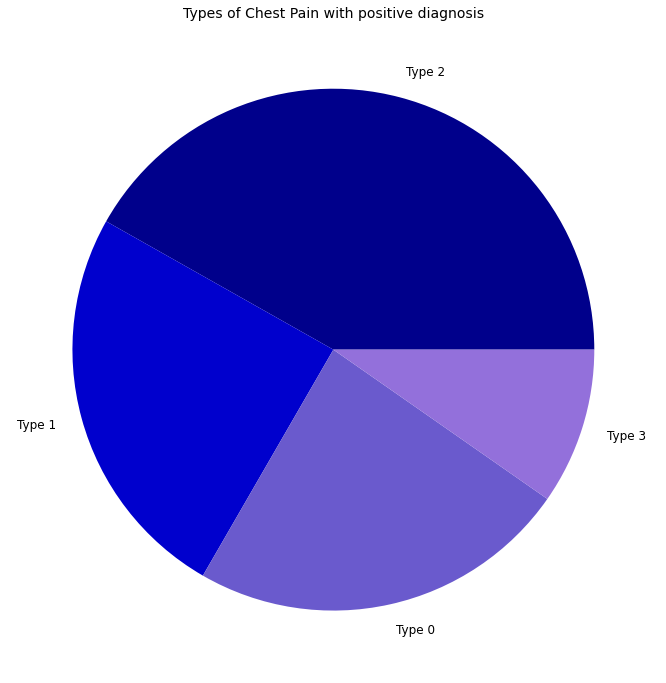

In [5]:
labels = ['Type 2','Type 1','Type 0', 'Type 3']
fig, ax = plt.subplots(figsize=(16, 12))
pos_diag = heart_data[heart_data.target == 1]
cp_types = pos_diag['cp'].value_counts()

plt.title('Types of Chest Pain with positive diagnosis', fontsize = 14)

plt.pie(cp_types, labels=labels, colors=['darkblue','mediumblue','slateblue','mediumpurple'],textprops={'fontsize':12})
plt.show()

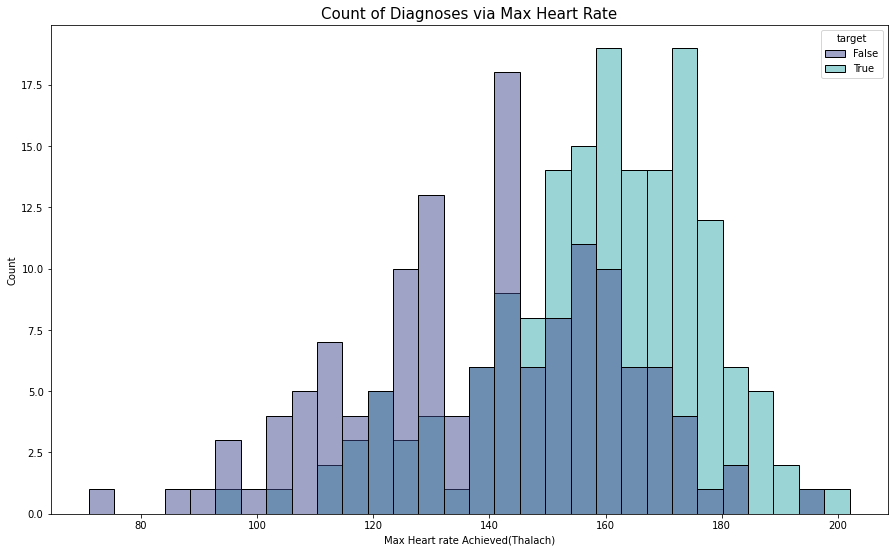

In [6]:
plt.figure(figsize=(15,9))
hist_plot=sb.histplot(data=heart_data,x='thalach',hue='target',bins=30,stat='count',palette='mako')

plt.title('Count of Diagnoses via Max Heart Rate',fontsize=15)
plt.xlabel('Max Heart rate Achieved(Thalach)');

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

X = heart_data[attributes]
y = heart_data.target

train_X, val_X, train_y, val_y = train_test_split(X,y, random_state = 0)
heart_model = DecisionTreeRegressor(max_leaf_nodes=50,random_state=0)

heart_model.fit(train_X,train_y)

DecisionTreeRegressor(max_leaf_nodes=50, random_state=0)

In [8]:
print("Making predictions for heart disease diagnosis")

print("The predictions are")
val_predictions = heart_model.predict(val_X)

print(f'Score: {heart_model.score(val_X,val_y)}')
print(f'Accuracy: {accuracy_score(val_predictions,val_y)}')

print(f'Mean absolute error {mean_absolute_error(val_y,val_predictions)}')

Making predictions for heart disease diagnosis
The predictions are
Score: 0.14305849189570097
Accuracy: 0.7894736842105263
Mean absolute error 0.21052631578947367


In [9]:
def get_mean_abs_error(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mean_abs_err = mean_absolute_error(val_y, preds_val)
    return(mean_abs_err)

**Testing the mean absolute error of the Decision Tree regression model at different leaf node values demonstrated that 50 leaf nodes was the most accurate in the range tested on this dataset, without increasing the compute burden.  The model was retroactively adjusted to realize this benefit.**

In [10]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
for max_leaf_nodes in candidate_max_leaf_nodes:
    my_mae = get_mean_abs_error(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print(f'{max_leaf_nodes} : {my_mae}')

5 : 0.29576023391812867
25 : 0.24777572414872184
50 : 0.21052631578947367
100 : 0.21052631578947367
250 : 0.21052631578947367
500 : 0.21052631578947367


# Heart Disease Diagnostic Tool
### Please enter the patient's information and then scroll to the bottom for results.

In [11]:
inp_age = 32

Age in years

In [12]:
inp_sex = "1"

Sex (1: Male, 0: Female)

In [13]:
inp_cp = "0"

Chest Pain (0-4, typical, asymptotic, non-anginal, non-typical)

In [14]:
inp_trestbp = 120

Resting Blood Pressure

In [15]:
inp_chol = 190

Serum Cholesterol in mg/dl

In [16]:
inp_fbs = "0"

Fasting Blood Sugar > 120 mg/dl (1: True, 0: False)

In [17]:
inp_restecg = "1"

Resting ECG Result (0: hypertrophy, 1: Normal, 2: ST abnormality))

In [18]:
inp_thalach = 187

Maximum Heart Rate in beats per minute

In [19]:
inp_exang = "0"

Exercise induced Angina

In [20]:
inp_oldpeak = 0.0

Oldpeak (ST depression induced by Exercise 0 - 6.2)

In [21]:
inp_slope = "1"

Slope of the peak exercise ST segment (1: Up, 2: Flat, 3: Down)

In [22]:
inp_ca = "0"

Coronary Calcium Scan Results ( # Major Vessels Colored 0 - 3)

In [23]:
inp_thal = "3"

Thalassemia ( 3: Normal, 6: Fixed Defect, 7: Reversible Defect)

In [24]:


# attributes = ['age', 'sex', 'trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

data = [[32,1,0,120,500,1, 1, 187, 0, 0, 2, 3, 3]]
df = pd.DataFrame(data, columns=['age', 'sex','cp', 'trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])


diag = int(heart_model.predict(df))

print(bool(diag))
if diag == 1:
    print('Heart Disease is likely present')
else:
    print('The patient is likely free from Heart Disease')


False
The patient is likely free from Heart Disease
